## Часть 1. Приоритизация гипотез.

In [1]:
# Подключим необходимые для работы библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 150

In [2]:
# Загрузим данные и сохраним их в переменную
data = pd.read_csv('/datasets/hypothesis.csv')
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Для удобства приведем названия колонок к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Приоритизация гипотез методом ICE

In [4]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Приоритизация гипотез методом RICE

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод

В результате применения метода RICE вместо ICE изменилась приоритизация гипотез. Так произошло по причине добавления в формулу расчета компонента "Reach", который отвечает за количество пользователей, которых затронет изменение (т.е. охват). Так, гипотеза "Добавить форму подписки на все основные страницы" получила 1 место, потому что изменения (в результате реализации гипотезы) затронут большее количество пользователей, чем изменения в результате реализации гипотезы "Запустить акцию, дающую скидку на товар в день", которая была в списке приотезации методом iCE на 1 месте.

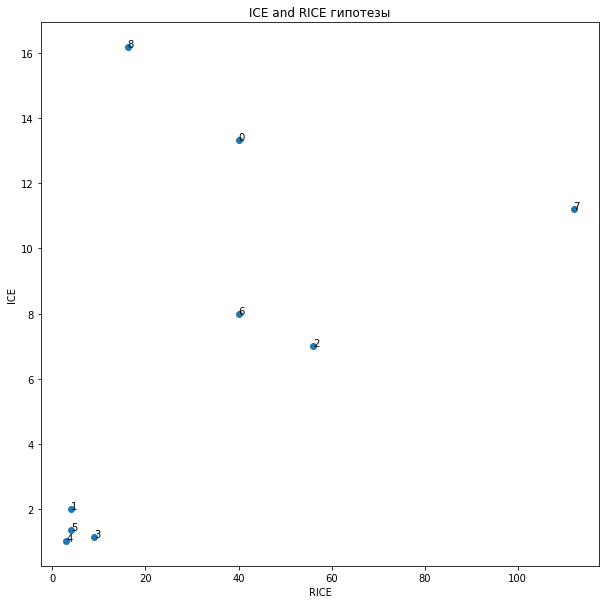

In [6]:
y = data['ICE'] 
z = data['RICE'] 
n = data.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()    

## Часть 2. Анализ A/B-теста

In [7]:
# Загрузим данные и сохраним их в переменные
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#проверим данные на наличие явных дубликатов
print('Количество полных дубликатов в visitors:', visitors.duplicated().sum())
print('Количество полных дубликатов в orders:', orders.duplicated().sum())

Количество полных дубликатов в visitors: 0
Количество полных дубликатов в orders: 0


**Пропусков, а также дубликатов в данных не обнаружено, требуется привести данные со временем к типу datetime в orders и visitors**

In [10]:
def date(df, df1):
    df['date'] = pd.to_datetime(df['date'])
    df1['date'] = pd.to_datetime(df1['date'])
    return df, df1
orders, visitors = date(orders, visitors)
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
#узнаем сколько групп в АВ-тесте
print('Количество групп в датафрейме orders:', orders['group'].nunique())
print('Количество групп в датафрейме visitors:', visitors['group'].nunique())

Количество групп в датафрейме orders: 2
Количество групп в датафрейме visitors: 2


In [12]:
#узнаем дату начала проведения теста
print('Начало АВ-теста orders:', orders['date'].dt.date.min())
print('Окончание АВ-теста orders:', orders['date'].dt.date.max())
print('Начало АВ-теста visitors:', visitors['date'].dt.date.min())
print('Окончание АВ-теста visitors:', visitors['date'].dt.date.max())

Начало АВ-теста orders: 2019-08-01
Окончание АВ-теста orders: 2019-08-31
Начало АВ-теста visitors: 2019-08-01
Окончание АВ-теста visitors: 2019-08-31


**В АВ-тесте участвует 2 группы, дата начала 2019-08-01 и дата окончания 2019-08-31 в датафреймах совпадают.** 

In [13]:
# Подготовим данные к дальнейшей работе, для удобства создадим таблицу, где будут отражены результаты А/В теста
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data_ab = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data_ab.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [14]:
# проверим корректность созданного датафрейма
print('Начало АВ-теста:', data_ab['date'].dt.date.min())
print('Окончание АВ-теста:', data_ab['date'].dt.date.max())

Начало АВ-теста: 2019-08-01
Окончание АВ-теста: 2019-08-31


**Дата начала и окончания теста в созданном датафрейме совпадают с исходными данными.Датафрейм создан корректно.**

### График кумулятивной выручки по группам. 

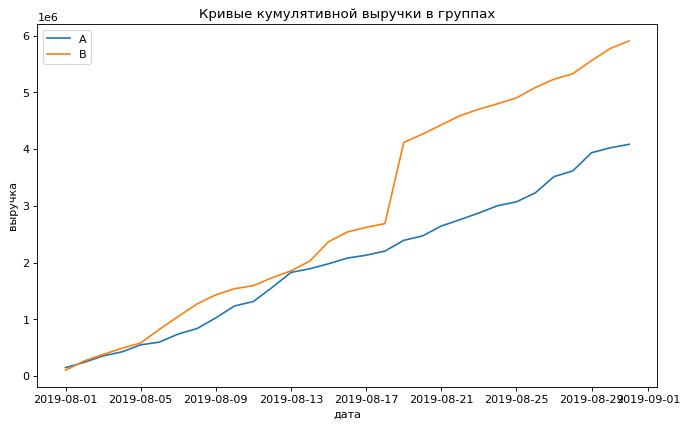

In [15]:
# Строим график выручки группы A
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.plot(data_ab['date'], data_ab['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(data_ab['date'], data_ab['revenueCummulativeB'], label='B')

plt.legend() 
plt.xlabel('дата') 
plt.ylabel('выручка')
plt.title('Кривые кумулятивной выручки в группах')  

plt.show()

#### Выводы и предположения.
Выручка в каждой группе равномерно увеличивается в течение всего теста. Вместе с тем график выручки группы В в одной точке резко растет. Это может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### График кумулятивного среднего чека по группам.  

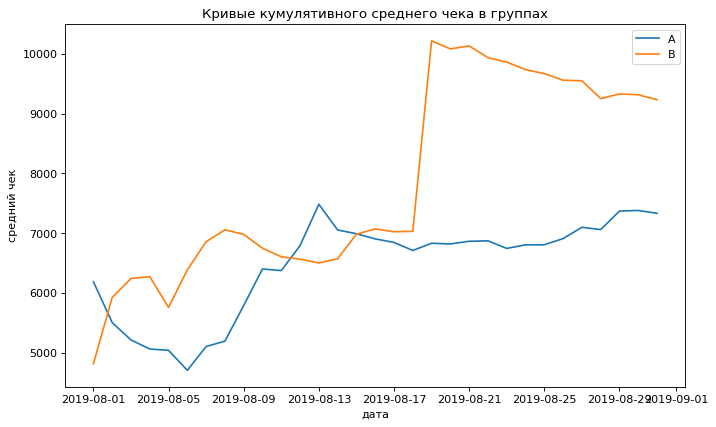

In [16]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
figure(figsize=(10, 6), dpi=80)
# Строим график среднего чека группы A
plt.plot(data_ab['date'], data_ab['revenueCummulativeA']/data_ab['ordersCummulativeA'], label='A')

# Строим график среднего чека группы B
plt.plot(data_ab['date'], data_ab['revenueCummulativeB']/data_ab['ordersCummulativeB'], label='B')

plt.legend() 
plt.xlabel('дата') 
plt.ylabel('средний чек')
plt.title('Кривые кумулятивного среднего чека в группах')  

plt.show()

#### Выводы и предположения.
Средний чек становится равномерным ближе к концу теста. В первой половине теста присутствует множество резких всплесков на графике, что может говорить о том, что в тест попали крупные заказы. Для оценки среднего чека необходимо больше данных, либо исключить из выборки аномальные заказы. 

### График относительного изменения кумулятивного среднего чека группы B к группе A.

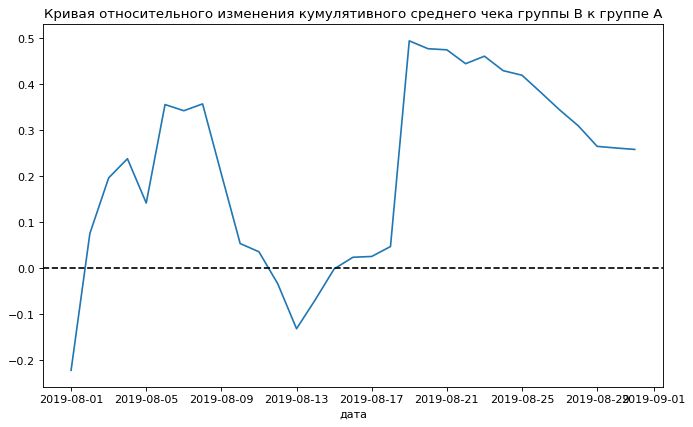

In [17]:
# cтроим отношение средних чеков
figure(figsize=(10, 6), dpi=80)
plt.plot(data_ab['date'], (data_ab['revenueCummulativeB']/data_ab['ordersCummulativeB'])/(data_ab['revenueCummulativeA']/data_ab['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('дата') 
plt.title('Кривая относительного изменения кумулятивного среднего чека группы B к группе A')  

plt.show()

#### Выводы и предположения.
В нескольких точках график различия сильно "скачет", что указывает на наличие аномально крупных заказов. Чтобы сделать окончательный вывод необходимо очистить данные от выбросов. 

###  График кумулятивной конверсии по группам.

In [18]:
print(data_ab['date'].min())
print(data_ab['date'].max())


2019-08-01 00:00:00
2019-08-31 00:00:00


In [19]:
data_ab.columns

Index(['date', 'ordersPerDateA', 'revenuePerDateA', 'ordersPerDateB',
       'revenuePerDateB', 'ordersCummulativeA', 'revenueCummulativeA',
       'ordersCummulativeB', 'revenueCummulativeB', 'visitorsPerDateA',
       'visitorsPerDateB', 'visitorsCummulativeA', 'visitorsCummulativeB'],
      dtype='object')

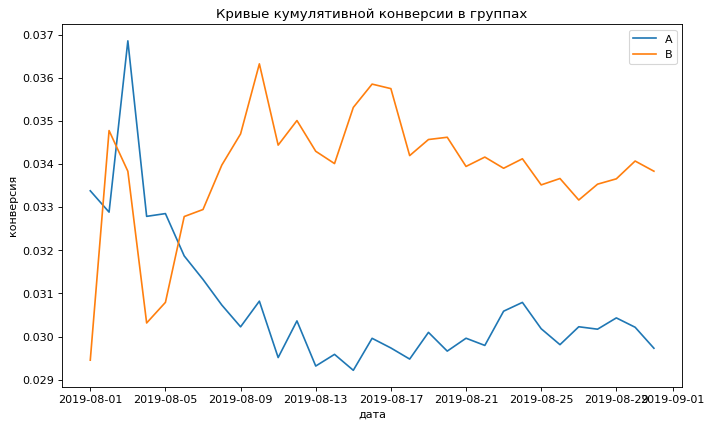

In [20]:
# строим графики 
figure(figsize=(10, 6), dpi=80)
plt.plot(data_ab['date'], data_ab['ordersCummulativeA']/data_ab['visitorsCummulativeA'], label='A')
plt.plot(data_ab['date'], data_ab['ordersCummulativeB']/data_ab['visitorsCummulativeB'], label='B')
plt.legend()
plt.xlabel('дата') 
plt.ylabel('конверсия')
plt.title('Кривые кумулятивной конверсии в группах')  

plt.show()

#### Выводы и предположения.
Графики кумулятивной конверсии очень "скачут". В первой половине теста сильные всплески, к концу теста граффики "выравниваются", конверсия группы В выше, чем группы А

### График относительного изменения кумулятивной конверсии группы B к группе A.

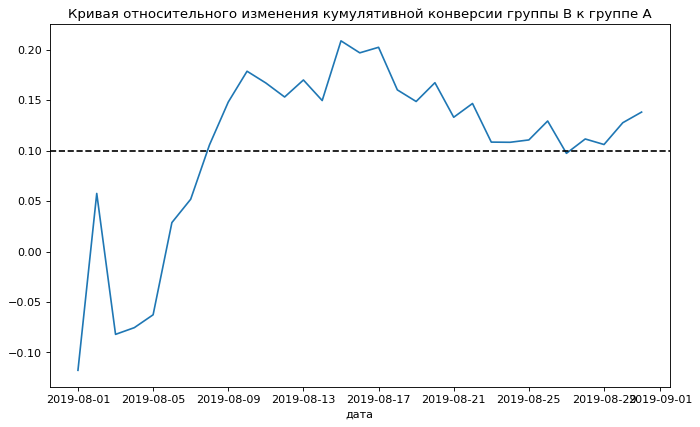

In [21]:
figure(figsize=(10, 6), dpi=80)

plt.plot(data_ab['date'], (data_ab['ordersCummulativeB']/data_ab['visitorsCummulativeB'])/(data_ab['ordersCummulativeA']/data_ab['visitorsCummulativeA'])-1)
plt.axhline(y=0.1, color='black', linestyle='--') 
plt.xlabel('дата') 
plt.title('Кривая относительного изменения кумулятивной конверсии группы B к группе A')  
plt.show()

#### Выводы и предположения.
В начале теста группа B значительно уступала группе A, затем вырвалась вперёд. Потом её конверсия снова резко ухудшилась, но во второй половине растёт. Очень нестабильный график.

### Точечный график количества заказов по пользователям.

In [22]:
# Подсчитаем количество заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


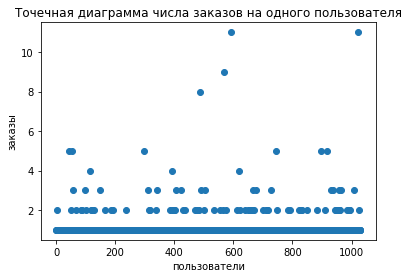

In [23]:
# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('пользователи') 
plt.ylabel('заказы')
plt.title('Точечная диаграмма числа заказов на одного пользователя')  
plt.show()

#### Выводы и предположения.
Чаще всего 1 пользователь делал 1-2 заказа, реже 3. Однако сложно оценить долю таких клиентов, чтобы понять какие заказы являются выбросами, для этого необходимо посчитать выборочные перцентили количества заказов на одного пользователя.

### 95-й и 99-й перцентили количества заказов на пользователя.

In [24]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

#### Выводы и предположения.
Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов.

In [25]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


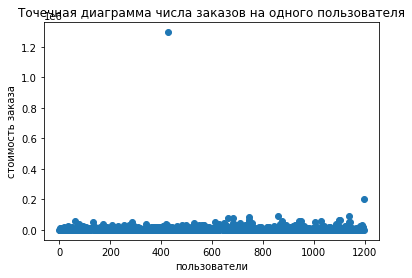

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('пользователи') 
plt.ylabel('стоимость заказа')
plt.title('Точечная диаграмма числа заказов на одного пользователя')  
plt.show()

(0.0, 1210.0, 0.0, 100000.0)

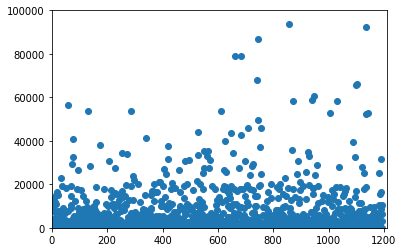

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1210, 0, 100000])

####  Выводы и предположения.
Есть единичный заказ свыше 1,2 млн и около 200 тыс, остальные заказы до 100 тыс, график не позволяет оценить какие заказы считать выбросами. 

### 95-й и 99-й перцентили стоимости заказов.

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

####  Выводы и предположения.
Менее 1% заказа на сумму свыше 58 тыс. Предгается взять за нижнюю границу стоимости заказов чек в 30 тыс, все заказы, которые окажутся выше - отсеять как аномальные заказы. 

### Проверка статистической значимости различий в конверсии между группами по «сырым» данным.
В качестве нулевой гипотезы примем, что различий в конверсии между группами  нет. Альтернативная гипотеза - различия есть. Уровень значимости будет равен 0,05. Если p-value будет больше, то нулевую гипотезу не будем отвергать. 

*Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.*

In [29]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
display(ordersByUsersA.head())
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


*Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.*

In [31]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_ab['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_ab['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

*Проверим статистическую значимость различий в конверсии между группами, а также найдем относительное различие в конверсиях между группами*.

In [32]:
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('конверсия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
конверсия: 0.138


#### Выводы:
p-value оказалось меньше, нулевая гипотеза отвергается. Результаты свидетельствуют о том, что различия в конверсиях между группами есть и они статистически значимы, чтобы их игнорировать.  Коверсия в группе В на 13,8 % выше, чем в группе А. 

### Проверка статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 
Н0: различий в среднем чеке между группами нет
Н1: различия есть
уровень статистической значимости 0,05

In [33]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('средний чек','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
средний чек 0.259


#### Выводы:
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Вместе с тем средний чек группы B выше среднего чека группы A на 26%. 

### Проверка статистической значимости различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [34]:
# Объединим аномальных пользователей в таблице abnormalUsers
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64


74

**74 аномальных пользователей, которые могли повлиять на результаты теста.**

In [35]:
# Подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_ab['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_ab['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [36]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('конверсия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
конверсия: 0.173


#### Выводы:
После очищения данных результаты не изменились - различия в конверсии между группами есть.  Конверсия группы В  на 17% выше, чем в группе А (до фильтрации данных на 14%).

### Проверка статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [37]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('средний чек:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.738
средний чек: -0.020


#### Выводы:
Различий в среднем чеке также не выявлено. Однако результат относительного различия в группах совершенно иной. Если до фильтрации данных средний чек в группе В был выше на 29, то сейчас он на 2 % ниже. 

### Общий вывод

В результате исследования была осуществлена приоритизация гипотез двумя методами ICE и RICE. Поскольку метод RICE включает такой компонент, как охват пользователей, гипотезы получили разное место в списке.

В результате анализа графиков кумулятивного среднего чека и кумулятивной конверсиии, на первый взгляд, можно было предположить, особенно по второй половине теста, когда графики относительно "выравнялись", что А/В тест позволил зафиксировать разницу в группах и прийти к выводу, что исследуемые изменения положительно повлияли на продажи. Однако наличие всплесков на графиках косвенно указывали на ниличие аномальных данных, которые могли искажать реальную картину. Благодаря построению точечных графиков и нахождению 95 и 99 перцентилей, были определены границы аномальных данных. Было принято решение исключить из выборок пользователей, совершивших более 2 заказов и суммой чека свыше 28 тыс.В результате из данных было исключено 74 пользователей. Вместе с тем фильтрация данных не привела к изменению результатов проверки статистической значимости различий в конверсии между группами. Тест показал, что разница в конверсии между группами значительная, чтобы принять за статистическую погрешность. Так, в группе В конверсия оказалась на 17 % выше, чем в группе А. Также тест не зафиксировал разницу в среднем чеке в группах, где средний чек в группе В оказался на 2% меньше, чем в группе А. Стоит отметить, что до фильтрации средний чек в группе В был выше на 26 %. Скорее всего, в выборку попал аномально большой заказ, который исказил общую картину. 

АВ-тест зафиксировал более высокую конверсию в группе В. Таким образом, тест можно завершить и признать победу группы В над грауппой А.